<a href="https://colab.research.google.com/github/lucascardosossa/DataScience-KMeans-Grp30/blob/main/Projeto_Kmeans_Unidade_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação das Bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Carregando Dataset

In [2]:
#Montando o drive do google para importar o dataset
from google.colab import drive
drive.mount('/content/drive')

# Carregar os dados de treinamento e teste
train_data = pd.read_csv('/content/drive/MyDrive/Residencia/UCI_HAR_dataset/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Residencia/UCI_HAR_dataset/test.csv')

train_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## 1.Definição e Preparação do Problema

###a. Distribuição

In [ ]:
# Obter estatísticas descritivas
print(train_data.describe())

# Verificar a distribuição das atividades
activity_counts = train_data['Activity'].value_counts()
print(activity_counts)

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


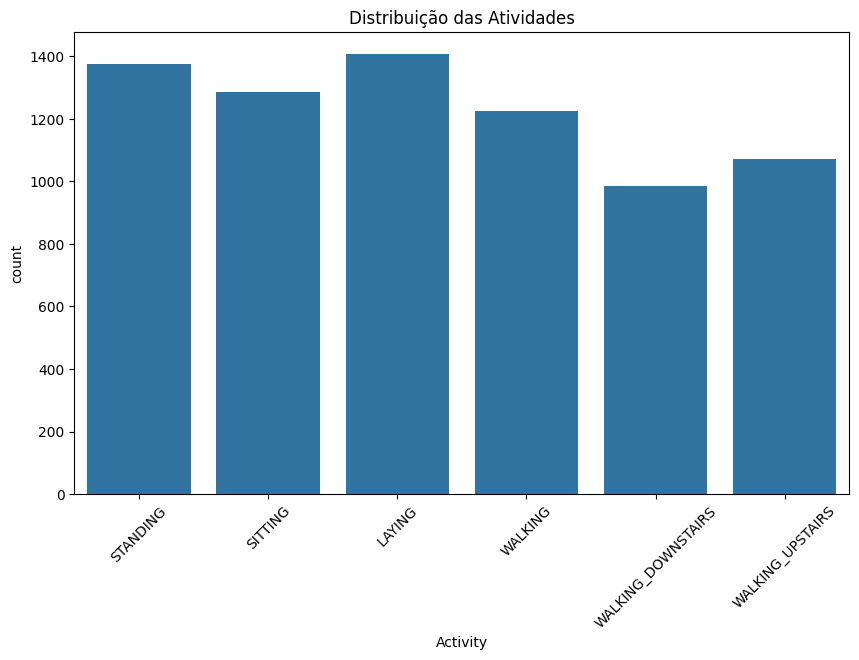

In [ ]:
# Visualizar a distribuição das atividades
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=train_data)
plt.title('Distribuição das Atividades')
plt.xticks(rotation=45)
plt.show()

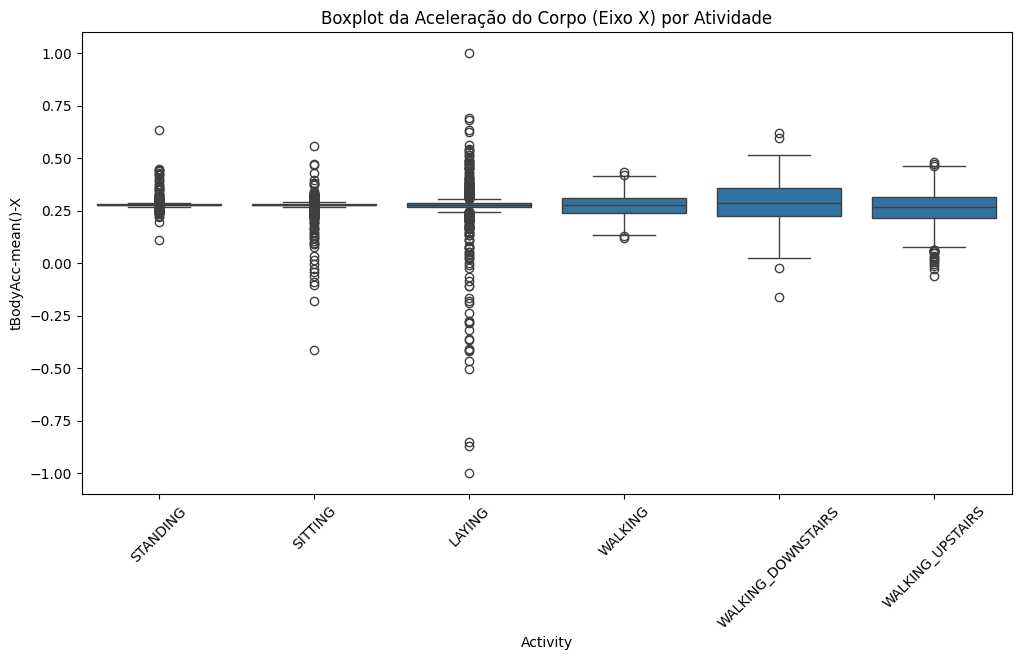

In [ ]:
# Boxplot para Comparar Atividades para detectar padrões nas medições dos sensores

plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='tBodyAcc-mean()-X', data=train_data)
plt.title('Boxplot da Aceleração do Corpo (Eixo X) por Atividade')
plt.xticks(rotation=45)
plt.show()

###b. Correlação

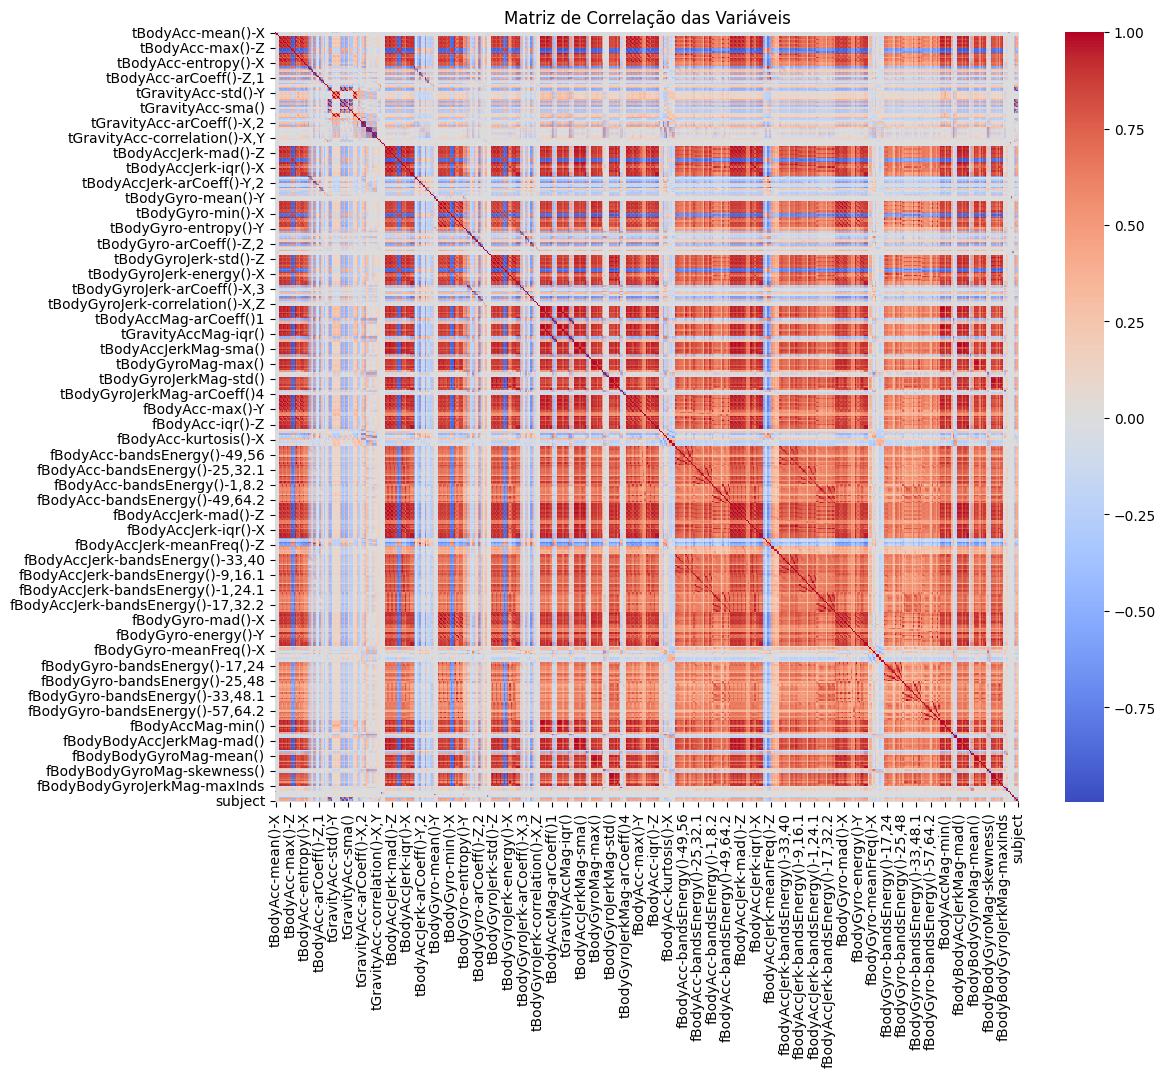

Variáveis com alta correlação: ['tBodyGyro-max()-Z', 'tBodyGyro-std()-Z', 'tBodyGyro-arCoeff()-X,3', 'fBodyAccJerk-bandsEnergy()-33,48.2', 'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-kurtosis()-Y', 'fBodyAccJerk-entropy()-Z', 'tBodyGyro-energy()-Z', 'fBodyAcc-bandsEnergy()-1,16.1', 'tBodyAccJerk-std()-Z', 'tGravityAcc-min()-Z', 'tBodyGyro-arCoeff()-Y,2', 'angle(X,gravityMean)', 'fBodyGyro-bandsEnergy()-41,48.2', 'fBodyAccJerk-bandsEnergy()-17,32', 'tBodyAccJerk-arCoeff()-X,3', 'tBodyGyro-mean()-Y', 'fBodyGyro-bandsEnergy()-25,48.1', 'fBodyGyro-bandsEnergy()-33,40.2', 'fBodyGyro-mean()-X', 'fBodyAccJerk-iqr()-X', 'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-mean()', 'tBodyGyroMag-entropy()', 'tBodyGyro-arCoeff()-Z,1', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyGyro-bandsEnergy()-9,16', 'fBodyAccJerk-kurtosis()-Z', 'fBodyAccJerk-bandsEnergy()-1,8', 'tBodyAccMag-arCoeff()2', 'fBodyBodyGyroMag-std()', 'tBodyAcc-arCoeff()-X,3', 'tGravityAccMag-iqr()', 'fBodyGyro-bandsEnergy()-57,64.2', 'tBodyAcc

In [ ]:
# Calcular a matriz de correlação

X = train_data.drop(columns=['Activity'])

correlation_matrix = X.corr()

#Visualizar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Selecionar variáveis com alta correlação
# Definindo um limite de correlação
threshold = 0.7

# Encontrar pares de variáveis com correlação acima do limite
high_correlation_vars = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_vars.add(colname)

# Convertendo para lista
high_correlation_vars = list(high_correlation_vars)
print("Variáveis com alta correlação:", high_correlation_vars)

# Selecionar apenas as variáveis altamente correlacionadas
selected_data = X[high_correlation_vars]

### c. Reduçao de Dimensionalidade

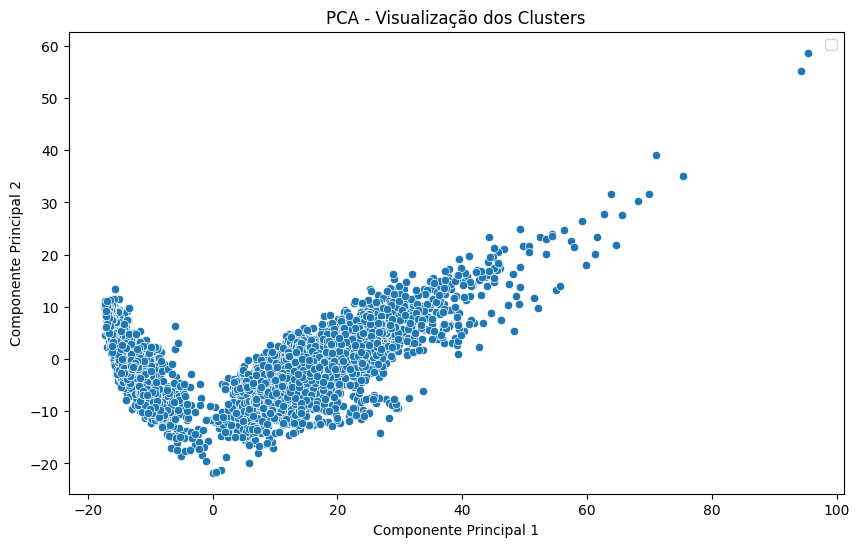

In [8]:
# O PCA transforma os dados originais em um novo conjunto de variáveis, chamadas de componentes principais, que retêm a maior parte da variância dos dados originais

# Normalizar os dados para que todas as variáveis tenham a mesma escala.
df = train_data.drop(columns=['Activity'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar o PCA para reduzir a dimensionalidade dos dados.
pca = PCA(n_components=2)  # Reduzir para 2 dimensões
principal_components = pca.fit_transform(df_scaled)

# Criando um novo DataFrame que contenha os componentes principais.
df_pca = pd.DataFrame(data=principal_components, columns=['P1', 'P2'])
#df_pca.head()
# Resultados

plt.figure(figsize=(10, 6))
sns.scatterplot(x='P1', y='P2', data=df_pca)
plt.title('PCA - Visualização dos Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

## 2. Implementação do Algoritmo de K-means

<ipython-input-13-5c2470c19e26>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis', s=100)


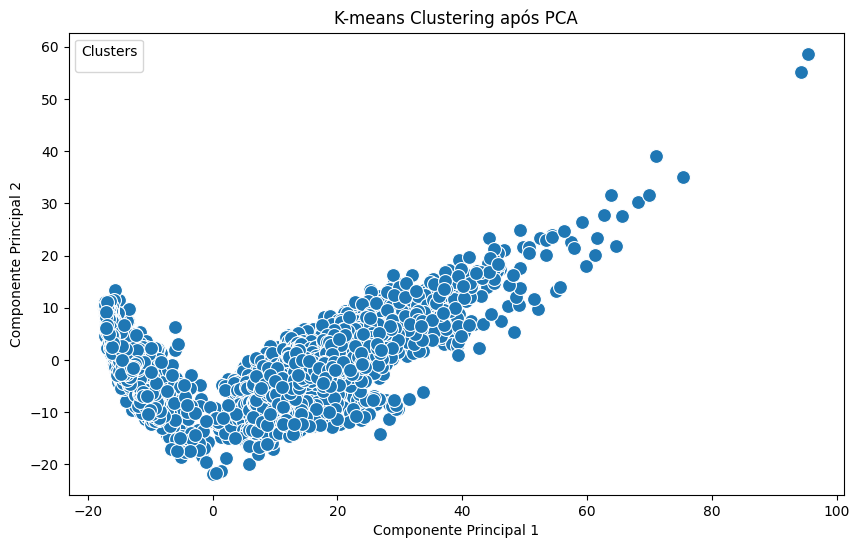

In [13]:
# 1. Referenciar o Dataset
df1 = train_data.drop(columns=['Activity'])

# 2. Pré-processamento dos Dados
# Selecionando apenas as colunas relevantes, exceto a última.
X = df1.iloc[:, :-1]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicando PCA para Redução de Dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Aplicando o algoritmo do K-means
# Definindo o número de clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

# Adicionar os rótulos de cluster ao DataFrame
df1['Cluster'] = kmeans.labels_

# 5. Visualizar os Resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis', s=100)
plt.title('K-means Clustering após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')
plt.show()

## 3. Otimização e Ajustes

<ipython-input-14-8ad8b12d6e69>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis', s=100)


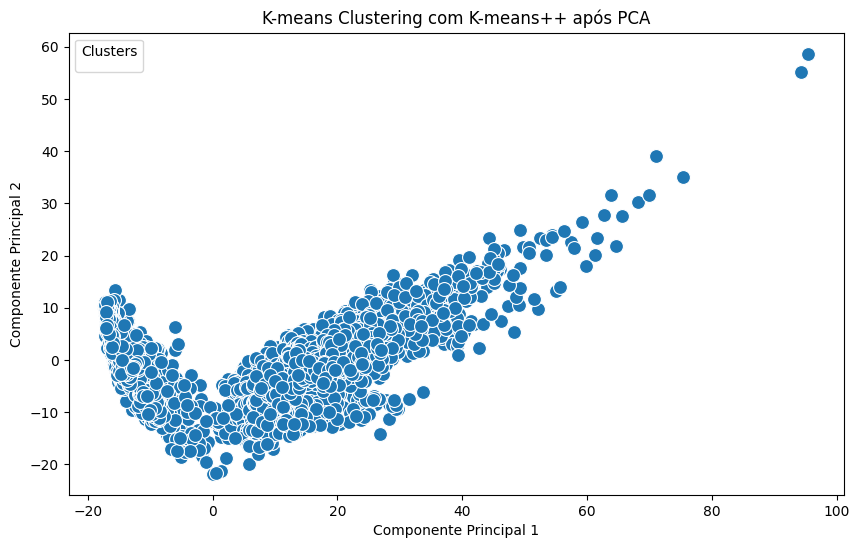

In [14]:
# Aplicar K-means com Inicialização K-means++
# Definir o número de clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Adicionar os rótulos de cluster ao DataFrame
df1['Cluster'] = kmeans.labels_

# 5. Visualizar os Resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis', s=100)
plt.title('K-means Clustering com K-means++ após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')
plt.show()

## 4. Análise e Visualização dos Resultados

In [18]:
#Calcular Silhouette Score e Inércia
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
inertia = kmeans.inertia_

# 6. Apresentar os Resultados
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Inércia: {inertia:.4f}')

Silhouette Score: 0.4737
Inércia: 148379.0386
